In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

### Getting the data

In [6]:
#getting all the datasets
real_data = pd.read_csv('../Data/GOOG.csv').set_index('Date')  
real_data.info()

WGANGP_data = pd.read_csv('../Data/WGANGP_synth_data.csv').set_index('Date')
CTGAN_data = pd.read_csv('../Data/CTGAN_synth_data.csv').drop('Unnamed: 0', axis=1).set_index('Date')  
TimeGAN_data = pd.read_csv('../Data/TimeGAN_synth_data.csv').drop('Unnamed: 0', axis=1).set_index('Date')  
DopGAN_data = pd.read_csv('../Data/DopGAN_synth_data.csv').drop('Unnamed: 0', axis=1).set_index('Date')

<class 'pandas.core.frame.DataFrame'>
Index: 2497 entries, 2013-02-01 to 2022-12-30
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2497 non-null   float64
 1   High        2497 non-null   float64
 2   Low         2497 non-null   float64
 3   Adj Close   2497 non-null   float64
 4   MSFT Close  2497 non-null   float64
 5   AMZN Close  2497 non-null   float64
 6   META Close  2497 non-null   float64
 7   AAPL Close  2497 non-null   float64
 8   7ma         2497 non-null   float64
 9   14ma        2497 non-null   float64
 10  21ma        2497 non-null   float64
 11  7atr        2497 non-null   float64
 12  14atr       2497 non-null   float64
 13  21atr       2497 non-null   float64
 14  7upper      2497 non-null   float64
 15  7lower      2497 non-null   float64
 16  14upper     2497 non-null   float64
 17  14lower     2497 non-null   float64
 18  21upper     2497 non-null   float64
 19  21lower     2497 

In [7]:
#dict of synthetic datasets
synth_datasets = {'WGANGP':WGANGP_data, 'CTGAN':CTGAN_data, 'TimeGAN':TimeGAN_data, 'DopGAN':DopGAN_data}
for key, item in synth_datasets.items():  
    print(key, item.shape)  
    item.info(), item.describe()  
    print('\n')   

WGANGP (2497, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 2497 entries, 2013-02-01 to 2022-12-30
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2497 non-null   float64
 1   High        2497 non-null   float64
 2   Low         2497 non-null   float64
 3   Adj Close   2497 non-null   float64
 4   MSFT Close  2497 non-null   float64
 5   AMZN Close  2497 non-null   float64
 6   META Close  2497 non-null   float64
 7   AAPL Close  2497 non-null   float64
 8   7ma         2497 non-null   float64
 9   14ma        2497 non-null   float64
 10  21ma        2497 non-null   float64
 11  7atr        2497 non-null   float64
 12  14atr       2497 non-null   float64
 13  21atr       2497 non-null   float64
 14  7upper      2497 non-null   float64
 15  7lower      2497 non-null   float64
 16  14upper     2497 non-null   float64
 17  14lower     2497 non-null   float64
 18  21upper     2497 non-null   float64
 19 

### Plotting Close values of each dataset

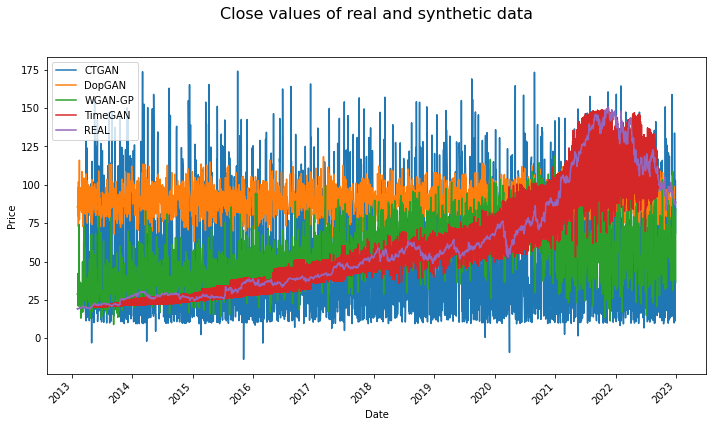

In [22]:
#Comparing Close values
plt.figure(figsize=(10,6))

CTGAN_data['Close'].plot(label='CTGAN')
DopGAN_data['Close'].plot(label='DopGAN')
WGANGP_data['Close'].plot(label='WGAN-GP')
TimeGAN_data['Close'].plot(label='TimeGAN')
real_data['Close'].plot(label='REAL')

plt.title('Close values of real and synthetic data', y=1.1, fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Helper Functions used in evaluations

In [8]:
#function for creating sequences
def create_sequences(features, target, input_size):
    X, y = [], []
    for i in range(len(features) - input_size):
        X.append(features[i:i + input_size])
        y.append(target[i + input_size])
    return np.array(X), np.array(y)

#function to create the model
def create_model(units, dropout_rate, optimizer, loss):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer=optimizer)
    return model

### Train an LSTM model on each synthetic dataset, then test on real data

WGANGP
X_train shape: (2467, 30, 20), 
y_train shape: (2467,), 
X_test shape: (2467, 30, 20), 
y_test shape: (2467,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           48400     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 128,901
Trainable params: 128,901
Non-trainable params: 0

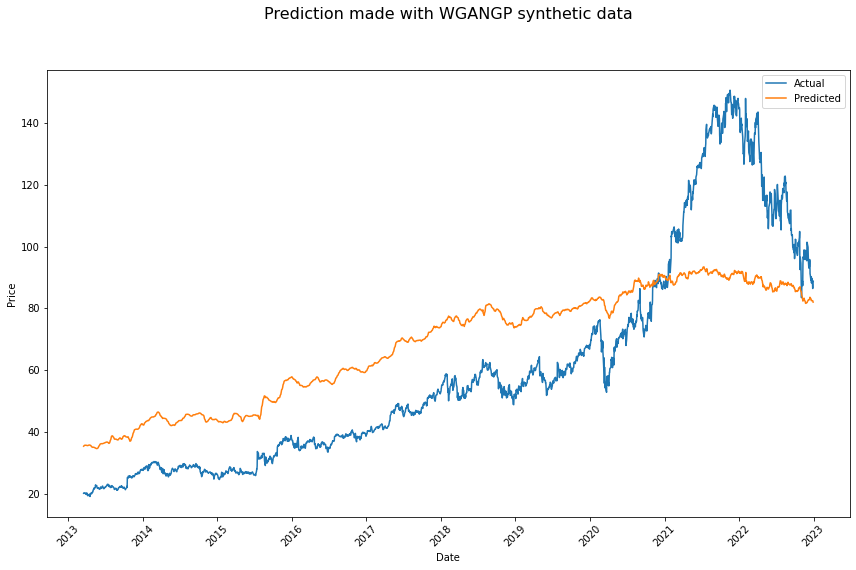

CTGAN
X_train shape: (2437, 30, 20), 
y_train shape: (2437,), 
X_test shape: (2467, 30, 20), 
y_test shape: (2467,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 100)           48400     
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 128,901
Trainable params: 128,901
Non-trainable params: 

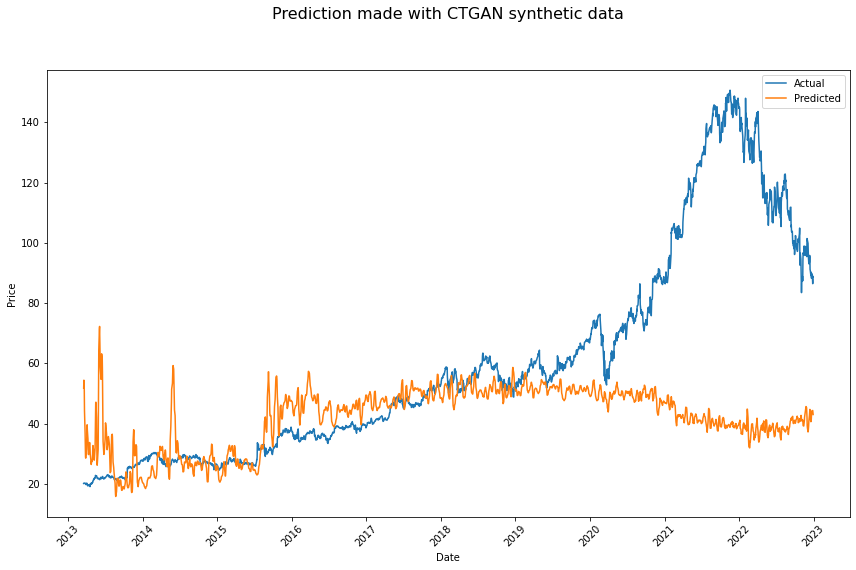

TimeGAN
X_train shape: (72930, 30, 20), 
y_train shape: (72930,), 
X_test shape: (2467, 30, 20), 
y_test shape: (2467,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 100)           48400     
                                                                 
 dropout_4 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 128,901
Trainable params: 128,901
Non-trainable para

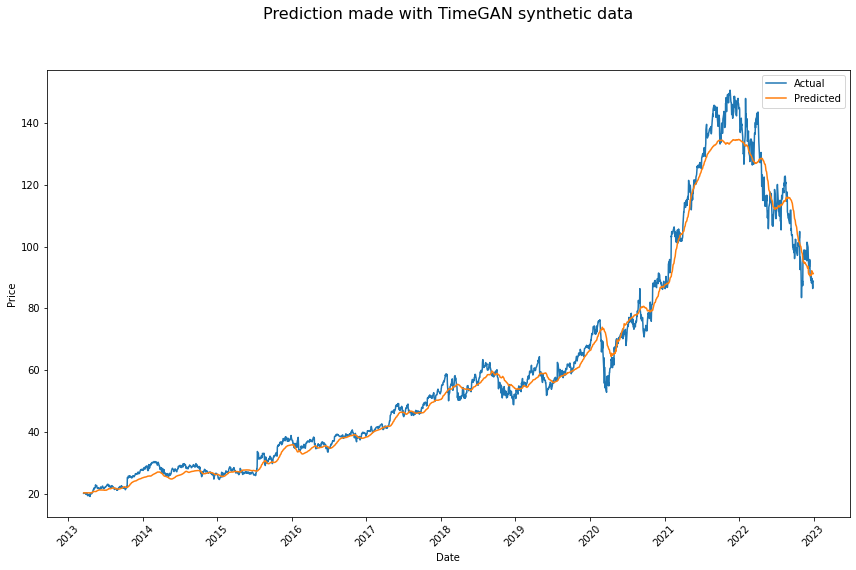

DopGAN
X_train shape: (3065, 30, 20), 
y_train shape: (3065,), 
X_test shape: (2467, 30, 20), 
y_test shape: (2467,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 100)           48400     
                                                                 
 dropout_6 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 128,901
Trainable params: 128,901
Non-trainable params:

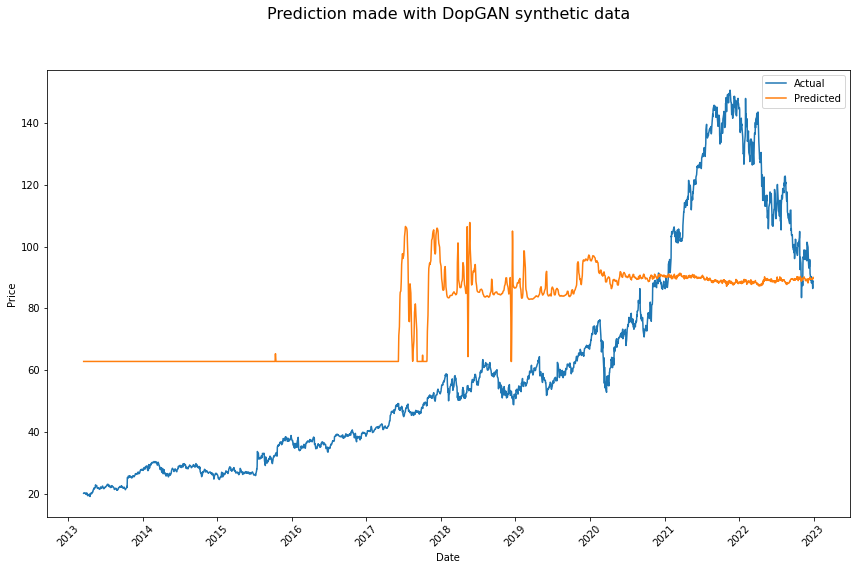

In [8]:
for key, item in synth_datasets.items():
    print(key)
    real_data = real_data
    synth_data = item #getting the synthetic data

    #setting x and y
    y_train_synth = synth_data['Close'].values
    x_train_synth = synth_data.drop(['Close'], axis=1).values

    y_test_real = real_data['Close'].values
    x_test_real = real_data.drop(['Close'], axis=1).values

    #scaling
    scaler_x = MinMaxScaler(feature_range=(0, 1))
    scaler_y = MinMaxScaler(feature_range=(0, 1))

    x_train_synth_scaled = scaler_x.fit_transform(x_train_synth)
    x_test_real_scaled = scaler_x.transform(x_test_real)

    y_train_synth_scaled = scaler_y.fit_transform(y_train_synth.reshape(-1, 1))
    y_test_real_scaled = scaler_y.transform(y_test_real.reshape(-1, 1))

    #creating sequences for both datasets
    input_size = 30
    X_train, y_train = create_sequences(x_train_synth_scaled, y_train_synth_scaled.flatten(), input_size)
    X_test, y_test = create_sequences(x_test_real_scaled, y_test_real_scaled.flatten(), input_size)

    # Check dimensions
    print(f'X_train shape: {X_train.shape}, \ny_train shape: {y_train.shape}, \nX_test shape: {X_test.shape}, \ny_test shape: {y_test.shape}')

    #creating the model with same params
    model = create_model(units=100, dropout_rate=0.2, optimizer='adam', loss='mean_squared_error')
    print(key, model.summary()) #printing model summary

    #fitting the model 
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)   

    #evaluating the model
    #making predictions
    y_pred = model.predict(X_test)
    #setting negative predictions to 0 as price can't go below 0
    y_pred = np.maximum(y_pred, 0)
    #rescaling
    y_pred_rescaled = scaler_y.inverse_transform(y_pred)
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))
    
    #calculating the RMSE
    rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    print(f"RMSE of prediction model trained on {key} synthetic, tested on real data: {rmse}")

    #Plot the predicted and actual stock prices
    #changing index to datetime
    real_data.index = pd.to_datetime(real_data.index)
    synth_data.index = pd.to_datetime(synth_data.index)
    #getting dates corresponding to y_test_rescaled
    test_dates = real_data.index[input_size:].values
    #creating the plot
    plt.figure(figsize=(12,8))
    plt.plot(test_dates, y_test_rescaled, label='Actual')
    plt.plot(test_dates, y_pred_rescaled, label='Predicted')
    plt.title(f'Prediction made with {key} synthetic data', y=1.1, fontsize = 16)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.xticks(rotation=45) 
    plt.tight_layout() 
    plt.show()

### Evaluation of the synthetic datasets combined with the original dataet

WGANGP synthetic data & real data combined
X_train shape: (3971, 30, 20), 
y_train shape: (3971,), 
X_test shape: (993, 30, 20), 
y_test shape: (993,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 100)           48400     
                                                                 
 dropout_6 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 128,901
Trainable par

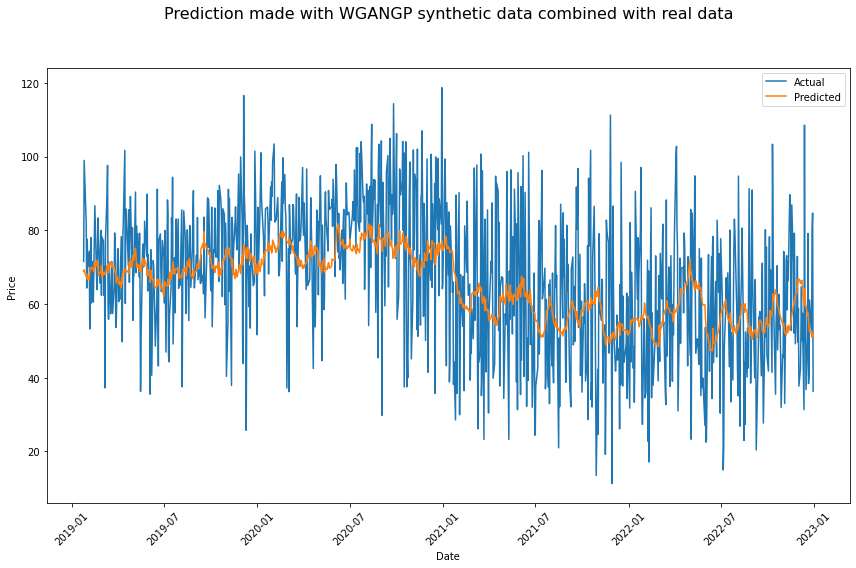

CTGAN synthetic data & real data combined
X_train shape: (3947, 30, 20), 
y_train shape: (3947,), 
X_test shape: (987, 30, 20), 
y_test shape: (987,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 100)           48400     
                                                                 
 dropout_8 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 128,901
Trainable para

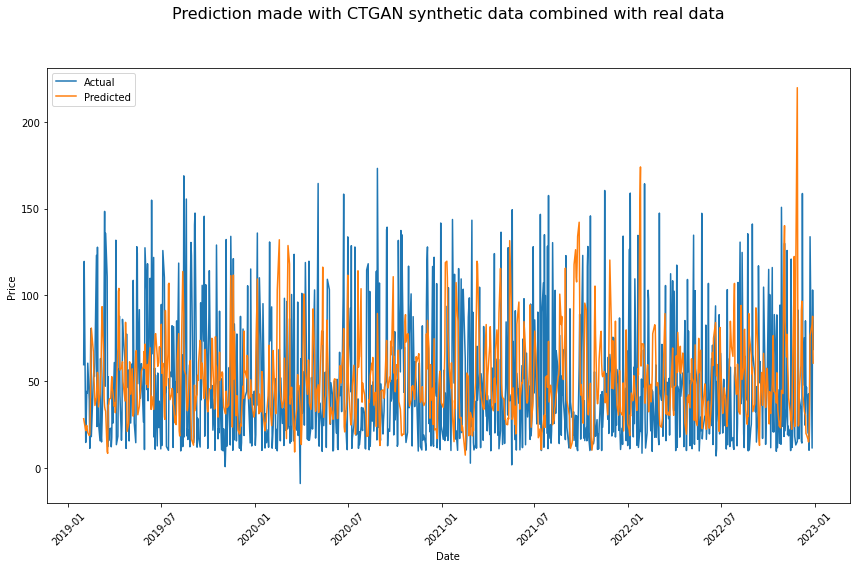

TimeGAN synthetic data & real data combined
X_train shape: (60341, 30, 20), 
y_train shape: (60341,), 
X_test shape: (15086, 30, 20), 
y_test shape: (15086,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 30, 100)           48400     
                                                                 
 dropout_10 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 128,901
Traina

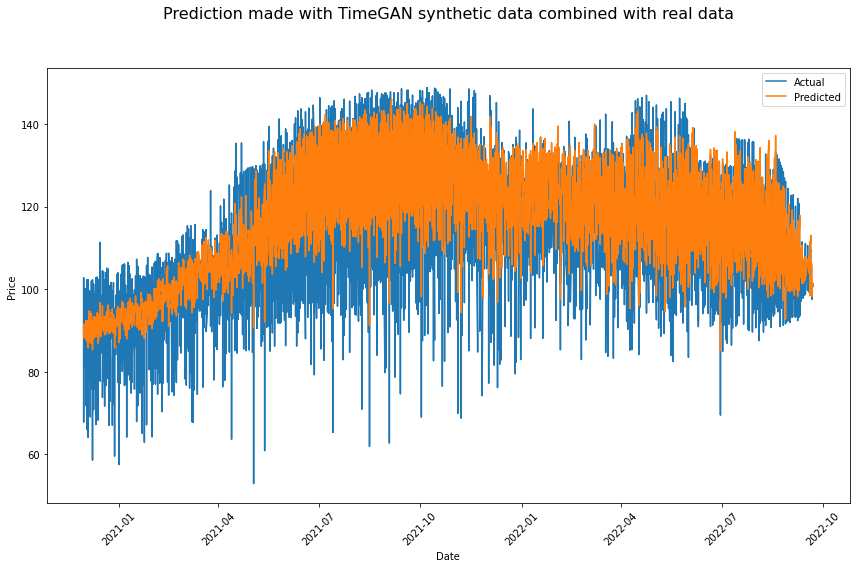

DopGAN synthetic data & real data combined
X_train shape: (4449, 30, 20), 
y_train shape: (4449,), 
X_test shape: (1113, 30, 20), 
y_test shape: (1113,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 100)           48400     
                                                                 
 dropout_12 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 128,901
Trainable p

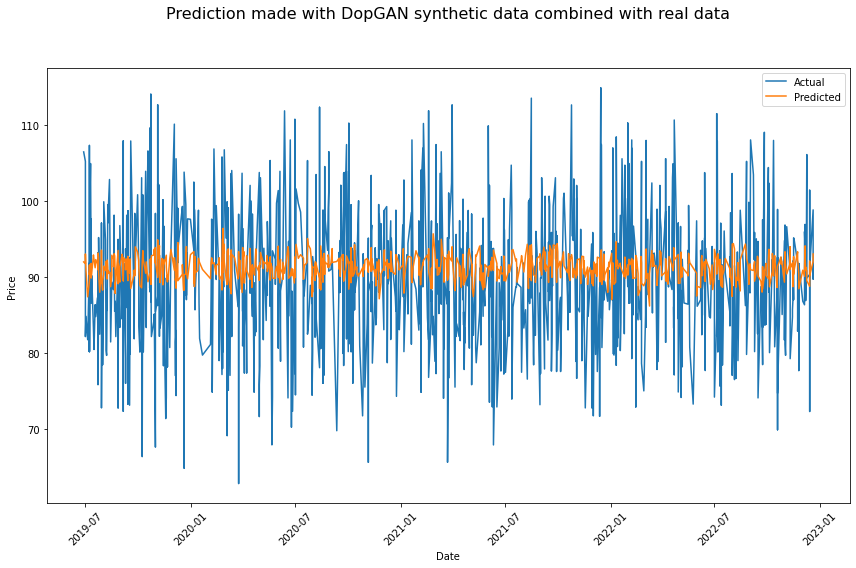

In [15]:

for key, item in synth_datasets.items():
    print(f'{key} synthetic data & real data combined')
    real_data = real_data
    synth_data = item #getting the synthetic data

    #concatenating the df's along rows
    combi_data = pd.concat([real_data, item], axis=0)

    #setting x and y
    combi_features = combi_data.drop('Close', axis=1).values
    combi_target = combi_data['Close'].values

    #scaling
    feature_scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_combi_features = feature_scaler.fit_transform(combi_features)
    scaled_combi_target = target_scaler.fit_transform(combi_target.reshape(-1, 1))
    scaled_combi_data = np.hstack((scaled_combi_features, scaled_combi_target))

    #creating sequences for both datasets
    input_size = 30
    X, y = create_sequences(scaled_combi_features, scaled_combi_target.flatten(), input_size)

    # train test split
    train_size = int(len(X) * 0.8)  #first 80% for train, rest for test
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Check dimensions
    print(f'X_train shape: {X_train.shape}, \ny_train shape: {y_train.shape}, \nX_test shape: {X_test.shape}, \ny_test shape: {y_test.shape}')

    #creating the model with same params
    model = create_model(units=100, dropout_rate=0.2, optimizer='adam', loss='mean_squared_error')
    print(key, model.summary()) #printing model summary

    #fitting the model 
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)   

    #evaluating the model
    #making predictions
    y_pred = model.predict(X_test)
    #setting negative predictions to 0 as price can't go below 0
    y_pred = np.maximum(y_pred, 0)
    #rescaling
    y_pred_rescaled = target_scaler.inverse_transform(y_pred)
    y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
    
    #calculating the RMSE
    rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    print(f"RMSE of prediction model trained on {key} synthetic data combined with real data: {rmse}")

    #Plot the predicted and actual stock prices
    #changing index to datetime
    real_data.index = pd.to_datetime(real_data.index)
    combi_data.index = pd.to_datetime(combi_data.index)
    #getting dates corresponding to y_test_rescaled
    test_dates = combi_data.index[-len(y_test_rescaled):]
    #creating the plot
    plt.figure(figsize=(12,8))
    plt.plot(test_dates, y_test_rescaled, label='Actual')
    plt.plot(test_dates, y_pred_rescaled, label='Predicted')
    plt.title(f'Prediction made with {key} synthetic data combined with real data', y=1.1, fontsize = 16)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.xticks(rotation=45) 
    plt.tight_layout() 
    plt.show()

### Calculating and plotting PCA and t-SNE for each dataset

WGANGP
(2467, 30, 21) (2467, 30, 21)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8400 samples in 0.001s...
[t-SNE] Computed neighbors for 8400 samples in 0.423s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8400
[t-SNE] Computed conditional probabilities for sample 2000 / 8400
[t-SNE] Computed conditional probabilities for sample 3000 / 8400
[t-SNE] Computed conditional probabilities for sample 4000 / 8400
[t-SNE] Computed conditional probabilities for sample 5000 / 8400
[t-SNE] Computed conditional probabilities for sample 6000 / 8400
[t-SNE] Computed conditional probabilities for sample 7000 / 8400
[t-SNE] Computed conditional probabilities for sample 8000 / 8400
[t-SNE] Computed conditional probabilities for sample 8400 / 8400
[t-SNE] Mean sigma: 17.256993
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.863846
[t-SNE] KL divergence after 1000 iterations: 0.665730
CTGAN
(2467, 30, 21) (2437, 30, 21)
[t-SNE] Computing 121 nearest

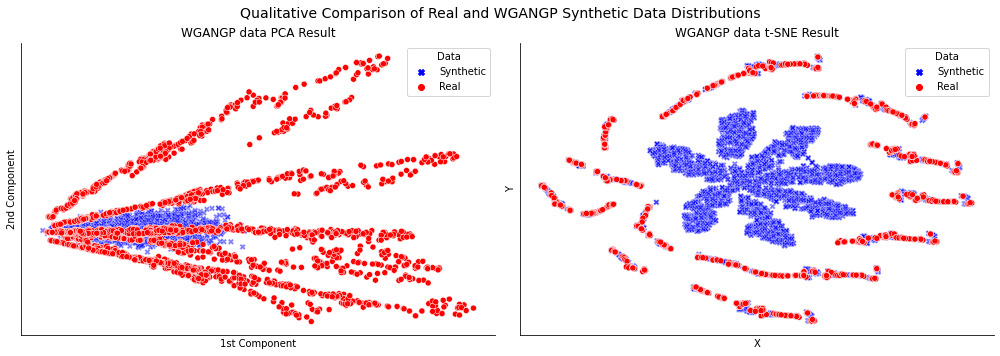

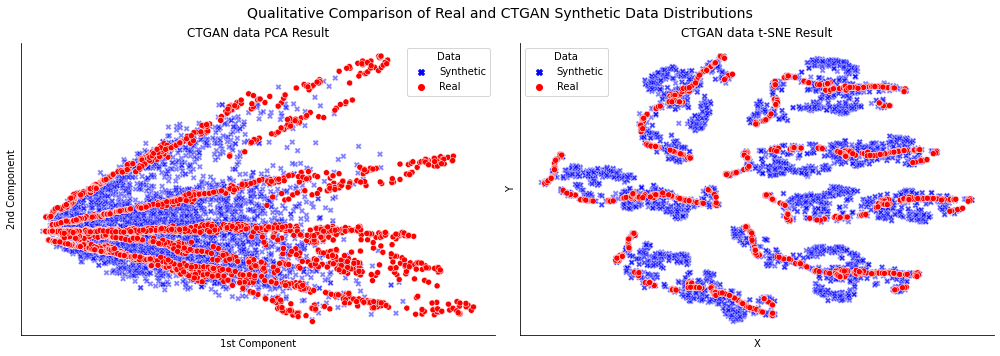

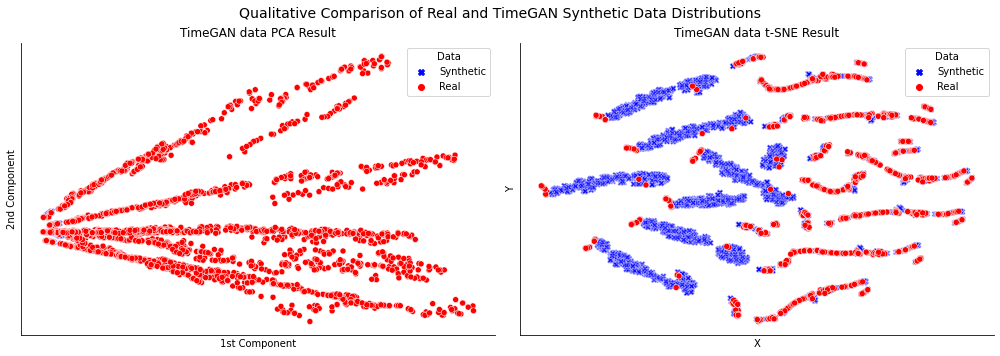

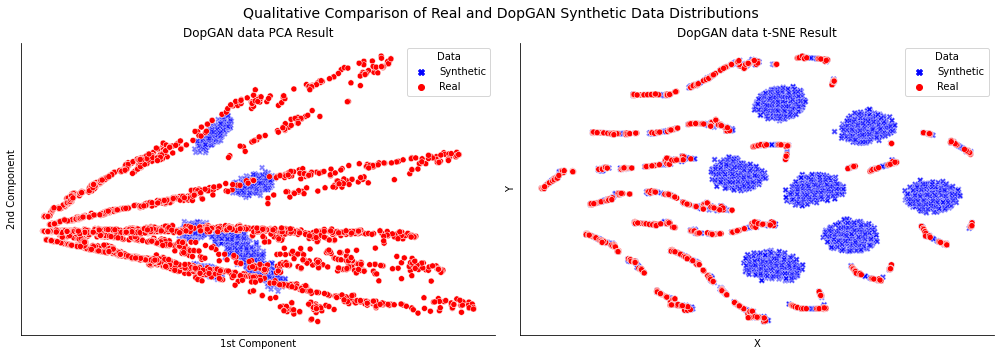

In [2]:
#performing PCA and t-SNE on the data

#function to create sequences for PCA & t-SNE plotting
def pca_sample_prep(df, input_size):
    data = []
    for i in range(len(df) - input_size):
        data.append(df[i:i + input_size])
    return np.array(data)

for key, item in synth_datasets.items():
    print(key)

    #prepping the sequences
    input_size = 30
    synth_data_sequences = pca_sample_prep(item, input_size)
    real_data_sequences = pca_sample_prep(real_data, input_size)
    print(real_data_sequences.shape, synth_data_sequences.shape)

    #ensuring the sample size is not larger than the smallest dataset
    smallest_dataset_size = min(len(real_data_sequences), len(synth_data_sequences))
    sample_size = min(smallest_dataset_size, 200)

    #making the samples
    idx = np.random.permutation(smallest_dataset_size - 1)[:sample_size]

    #data preprocessing
    real_sample = np.asarray(real_data_sequences)[idx]
    synth_sample = np.asarray(synth_data_sequences)[idx]
    real_sample_2d = real_sample.reshape(-1, input_size)
    synth_sample_2d = synth_sample.reshape(-1, input_size)

    #running the PCA
    pca = PCA(n_components=2)
    pca.fit(real_sample_2d)
    pca_real = pd.DataFrame(pca.transform(real_sample_2d), columns=['1st Component', '2nd Component']).assign(Data='Real')
    pca_synth = pd.DataFrame(pca.transform(synth_sample_2d), columns=['1st Component', '2nd Component']).assign(Data='Synthetic')
    pca_result = pd.concat([pca_real, pca_synth])

    #running t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=40)
    tsne_result = tsne.fit_transform(np.concatenate((real_sample_2d, synth_sample_2d), axis=0))
    tsne_result = pd.DataFrame(tsne_result, columns=['X', 'Y']).assign(Data='Real')
    tsne_result.loc[sample_size*6:, 'Data'] = 'Synthetic'

    #plotting results
    fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

    #PCA - synth data first, then real data
    sns.scatterplot(x='1st Component', y='2nd Component', data=pca_result[pca_result['Data'] == 'Synthetic'], 
                    hue='Data', style='Data', alpha=0.5, markers=["X"], palette=["blue"], ax=axes[0])
    sns.scatterplot(x='1st Component', y='2nd Component', data=pca_result[pca_result['Data'] == 'Real'], 
                    hue='Data', style='Data', markers=["o"], palette=["red"], ax=axes[0])
    axes[0].set_title(f'{key} data PCA Result')

    #t-SNE - synthetic data first, then real data
    sns.scatterplot(x='X', y='Y', data=tsne_result[tsne_result['Data'] == 'Synthetic'], 
                    hue='Data', style='Data', alpha=0.5, markers=["X"], palette=["blue"], ax=axes[1])
    sns.scatterplot(x='X', y='Y', data=tsne_result[tsne_result['Data'] == 'Real'], 
                    hue='Data', style='Data', markers=["o"], palette=["red"], ax=axes[1])
    axes[1].set_title(f'{key} data t-SNE Result')

    sns.despine()
    for i in [0, 1]:
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    fig.suptitle(f'Qualitative Comparison of Real and {key} Synthetic Data Distributions', fontsize=14)
    fig.tight_layout()
    fig.subplots_adjust(top=.88)